<a href="https://colab.research.google.com/github/yjy9500/Weather_Regression/blob/master/Weather_Regression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Library

In [ ]:
#Basis
import pandas as pd
import numpy as np
import os
#For Imputation
! pip install impyute
import impyute as impy
from fancyimpute import IterativeImputer
#Fot Plot
import matplotlib.pyplot as plt
import seaborn as sns
#For Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale, PolynomialFeatures
#For Split Data
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,GridSearchCV
from sklearn import model_selection
#For Regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima_model import ARIMA
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.tsa.api as tsa
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from datetime import datetime, timedelta
import time

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/gdrive",force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
cd /gdrive/My Drive/Classroom

/gdrive/My Drive/Classroom


# Data Preprocessing



Read csv Files

In [ ]:
#Read csv Files
Temperature_Features_ASOS=pd.read_csv("Temperature.Features.ASOS.csv")
Temperature_Features_AWS_616=pd.read_csv("Temperature.Features.AWS.616.csv")
Temperature_Features_AWS_637=pd.read_csv("Temperature.Features.AWS.637.csv")
RHumid_Features_ASOS=pd.read_csv("RHumid.Features.ASOS.csv")
RHumid_Features_AWS_616=pd.read_csv("RHumid.Features.AWS.616.csv")
RHumid_Features_AWS_637=pd.read_csv("RHumid.Features.AWS.637.csv")

Missing Data Imputation

In [ ]:
#Date to Number by toordinal function
TF_Date=Temperature_Features_ASOS["Date"].apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))
Temperature_Features_ASOS["Date"]=TF_Date.apply(lambda x: x.toordinal())
Temperature_Features_AWS_616["Date"]=TF_Date.apply(lambda x: x.toordinal())
Temperature_Features_AWS_637["Date"]=TF_Date.apply(lambda x: x.toordinal())
RHumid_Features_ASOS["Date"]=TF_Date.apply(lambda x: x.toordinal())
RHumid_Features_AWS_616["Date"]=TF_Date.apply(lambda x: x.toordinal())
RHumid_Features_AWS_637["Date"]=TF_Date.apply(lambda x: x.toordinal())

In [ ]:
###############
#  Method #1  # - Mice
############### - Baseline Model(=Linear Regression)에서 높은 성능

#Imputation by MICE(Multiple Imputation by Chained Equations) 결측치가 포함된 데이터를 입력 받아 몬테카를로 시뮬레이션을 반복, 결측치를 Imputate 하는 방법
TF_ASOS=pd.DataFrame(impy.mice(Temperature_Features_ASOS.values))
TF_ASOS.columns=Temperature_Features_ASOS.columns
TF_AWS_616=pd.DataFrame(impy.mice(Temperature_Features_AWS_616.values))
TF_AWS_616.columns=Temperature_Features_AWS_616.columns
TF_AWS_637=pd.DataFrame(impy.mice(Temperature_Features_AWS_637.values))
TF_AWS_637.columns=Temperature_Features_AWS_637.columns
HF_ASOS=pd.DataFrame(impy.mice(RHumid_Features_ASOS.values))
HF_ASOS.columns=RHumid_Features_ASOS.columns
HF_AWS_616=pd.DataFrame(impy.mice(RHumid_Features_AWS_616.values))
HF_AWS_616.columns=RHumid_Features_AWS_616.columns
HF_AWS_637=pd.DataFrame(impy.mice(RHumid_Features_AWS_637.values))
HF_AWS_637.columns=RHumid_Features_AWS_637.columns

In [ ]:
#Check the Null Values
TF_ASOS.isnull().values.any()

False

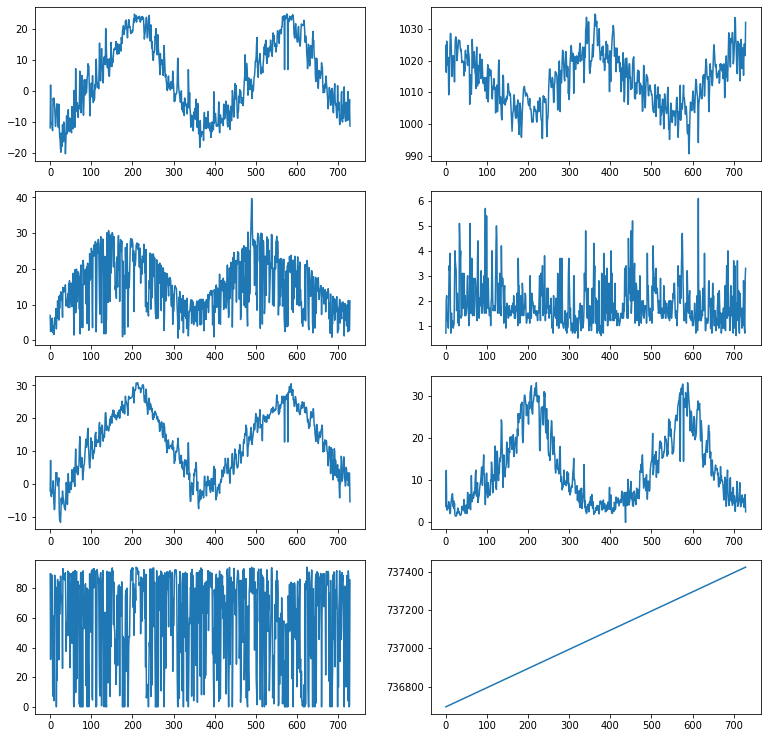

In [ ]:
#Build Data Plot
plt.figure(figsize=(13,13))
plt.subplot(4,2,1)
plt.plot(TF_ASOS.MinGrassTemperature)
plt.subplot(4,2,2)
plt.plot(TF_ASOS.AtmosphericPressure)
plt.subplot(4,2,3)
plt.plot(TF_ASOS.GlobalSolarRadiation)
plt.subplot(4,2,4)
plt.plot(TF_ASOS.WindSpeed)
plt.subplot(4,2,5)
plt.plot(TF_ASOS.AirTemperature)
plt.subplot(4,2,6)
plt.plot(TF_ASOS.VaporPressure)
plt.subplot(4,2,7)
plt.plot(TF_ASOS.PercnetSunshine)
plt.subplot(4,2,8)
plt.plot(TF_ASOS.Date)


In [ ]:
###############
#  Method #2  # - Iterative Imputer
############### - PCA와 Lasso에서 높은 성능

#Imputation by Iterative Imputer
#TF_ASOS=pd.DataFrame(IterativeImputer().fit_transform(Temperature_Features_ASOS.values))
#TF_ASOS.columns=Temperature_Features_ASOS.columns
#TF_AWS_616=pd.DataFrame(IterativeImputer().fit_transform(Temperature_Features_AWS_616.values))
#TF_AWS_616.columns=Temperature_Features_AWS_616.columns
#TF_AWS_637=pd.DataFrame(IterativeImputer().fit_transform(Temperature_Features_AWS_637.values))
#TF_AWS_637.columns=Temperature_Features_AWS_637.columns
#HF_ASOS=pd.DataFrame(IterativeImputer().fit_transform(RHumid_Features_ASOS.values))
#HF_ASOS.columns=RHumid_Features_ASOS.columns
#HF_AWS_616=pd.DataFrame(IterativeImputer().fit_transform(RHumid_Features_AWS_616.values))
#HF_AWS_616.columns=RHumid_Features_AWS_616.columns
#HF_AWS_637=pd.DataFrame(IterativeImputer().fit_transform(RHumid_Features_AWS_637.values))
#HF_AWS_637.columns=RHumid_Features_AWS_637.columns

In [ ]:
#Check the Null Values
TF_ASOS.isnull().values.any()

False

Merge Seperated Data Frames

In [ ]:
#Build Two Data Frames for Temperature

#ASOS & AWS Data for Temperature
Factory1_AS_AW_T = TF_ASOS.loc[:,["AirTemperature","WindSpeed"]]*(29/59)+TF_AWS_616.loc[:,["AirTemperature","WindSpeed"]]*(14/59)+TF_AWS_637.loc[:,["AirTemperature","WindSpeed"]]*(13/59)
Factory1_AS_AW_T["Date"] = TF_ASOS.loc[:,"Date"]
Factory2_AS_AW_T = TF_ASOS.loc[:,["AirTemperature","WindSpeed"]]*(31/61)+TF_AWS_616.loc[:,["AirTemperature","WindSpeed"]]*(16/61)+TF_AWS_637.loc[:,["AirTemperature","WindSpeed"]]*(14/61)
Factory2_AS_AW_T["Date"] = TF_ASOS.loc[:,"Date"]

#ASOS Data for Temperature
Factory_Temperature_ASOS=TF_ASOS.loc[:,["Date","VaporPressure","AtmosphericPressure","MinGrassTemperature","PercnetSunshine","GlobalSolarRadiation"]]

#Merge Datas
Factory1_Temperature = pd.merge(Factory1_AS_AW_T,Factory_Temperature_ASOS,on="Date")
Factory2_Temperature = pd.merge(Factory2_AS_AW_T,Factory_Temperature_ASOS,on="Date")

In [ ]:
#Build Two Data Frames for Relative Humidity

#ASOS & AWS Data for Humidity
Factory1_AS_AW_H = HF_ASOS.loc[:,["AirTemperature","RelativeHumidity","Precipitation"]]*(29/59)+HF_AWS_616.loc[:,["AirTemperature","RelativeHumidity","Precipitation"]]*(14/59)+HF_AWS_637.loc[:,["AirTemperature","RelativeHumidity","Precipitation"]]*(13/59)
Factory1_AS_AW_H["Date"] = HF_ASOS.loc[:,"Date"]
Factory2_AS_AW_H = HF_ASOS.loc[:,["AirTemperature","RelativeHumidity","Precipitation"]]*(31/61)+HF_AWS_616.loc[:,["AirTemperature","RelativeHumidity","Precipitation"]]*(16/61)+HF_AWS_637.loc[:,["AirTemperature","RelativeHumidity","Precipitation"]]*(14/61)
Factory2_AS_AW_H["Date"] = HF_ASOS.loc[:,"Date"]

#ASOS Data for Relative Humidity
Factory_RelativeHumidity_ASOS = HF_ASOS.loc[:,["Date","DewpointTemperature","LargeEvaporation","VaporPressure"]]

#Merge Datas
Factory1_Humidity = pd.merge(Factory1_AS_AW_H,Factory_RelativeHumidity_ASOS,on="Date")
Factory2_Humidity = pd.merge(Factory2_AS_AW_H,Factory_RelativeHumidity_ASOS,on="Date")

 - 공장 1, 2의 기온과 습도를 각각 Factory1_Humidity, Factory2_Humidity, Factory1_Temperature, Factory2_Temperature 에 정리하였다.



# Regression for Temperature

- HeatMap

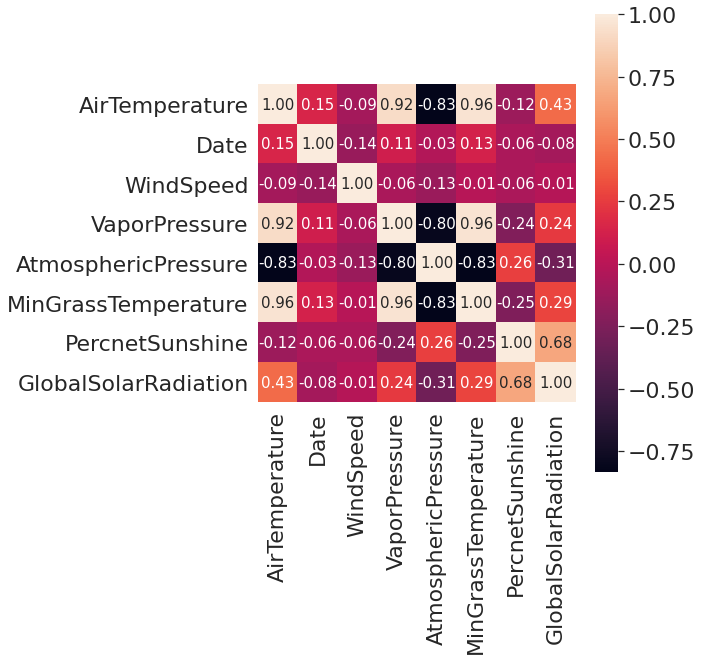

In [ ]:
#Build HeatMap
cols=["AirTemperature","Date","WindSpeed","VaporPressure","AtmosphericPressure","MinGrassTemperature","PercnetSunshine","GlobalSolarRadiation"]
cm = np.corrcoef(Factory1_Temperature[cols].values.T)
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
hm=sns.heatmap(cm, cbar=True, annot=True,square=True,fmt='.2f',annot_kws={"size":15},yticklabels=cols,xticklabels=cols)
plt.tight_layout()
plt.show()

* Interprete Multicolinearity

In [ ]:
model = smf.ols(formula='AirTemperature~Date+WindSpeed+VaporPressure+AtmosphericPressure+MinGrassTemperature+PercnetSunshine+GlobalSolarRadiation',data=Factory1_Temperature)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AirTemperature   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     2641.
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:02:53   Log-Likelihood:                -1488.6
No. Observations:                 730   AIC:                             2993.
Df Residuals:                     722   BIC:                             3030.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1559.7283    251.230     -6.208      0.000   -2052.957   -1066.499
Date                     0.0023      0.000      6.755      0.000       0.002       0.003
WindSpeed               -1.0662      0.097    -10.942      0.000      -1.257      -0.875
VaporPressure            0.0685      0.030      2.264      0.024       0.009       0.128
AtmosphericPressure     -0.1299      0.017     -7.585      0.000      -0.163      -0.096
MinGrassTemperature      0.6030      0.024     25.132      0.000       0.556       0.650
PercnetSunshine         -0.0112      0.004     -2.709      0.007      -0.019      -0.003
GlobalSolarRadiation     0.2531      0.018     14.243      0.000       0.218       0.288
==============================================================================
Omnibus:                       46.570   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.885
Skew:                          -0.302   Prob(JB):                     1.26e-27
Kurtosis:                       4.926   Cond. No.                     2.68e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Calculate VIF
y, X = dmatrices('AirTemperature~Date+WindSpeed+VaporPressure+AtmosphericPressure+MinGrassTemperature+PercnetSunshine+GlobalSolarRadiation', data=Factory1_Temperature, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,13180243.2,Intercept
1,1.1,Date
2,1.1,WindSpeed
3,13.9,VaporPressure
4,4.1,AtmosphericPressure
5,16.4,MinGrassTemperature
6,3.6,PercnetSunshine
7,3.8,GlobalSolarRadiation


In [ ]:
model = smf.ols(formula='AirTemperature~Date+WindSpeed+AtmosphericPressure+PercnetSunshine+GlobalSolarRadiation',data=Factory1_Temperature)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AirTemperature   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     538.2
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          5.01e-241
Time:                        09:02:58   Log-Likelihood:                -2120.0
No. Observations:                 730   AIC:                             4252.
Df Residuals:                     724   BIC:                             4280.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3398.3400    587.619     -5.783      0.000   -4551.981   -2244.699
Date                     0.0058      0.001      7.262      0.000       0.004       0.007
WindSpeed               -2.0997      0.222     -9.461      0.000      -2.535      -1.664
AtmosphericPressure     -0.8207      0.029    -28.474      0.000      -0.877      -0.764
PercnetSunshine         -0.0511      0.010     -5.373      0.000      -0.070      -0.032
GlobalSolarRadiation     0.4239      0.040     10.483      0.000       0.345       0.503
==============================================================================
Omnibus:                       18.313   Durbin-Watson:                   0.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.891
Skew:                           0.060   Prob(JB):                      0.00711
Kurtosis:                       2.443   Cond. No.                     2.64e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Calculate VIF
y, X = dmatrices('AirTemperature~Date+WindSpeed+AtmosphericPressure+PercnetSunshine+GlobalSolarRadiation', data=Factory1_Temperature, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,12821388.9,Intercept
1,1.0,Date
2,1.0,WindSpeed
3,2.1,AtmosphericPressure
4,3.4,PercnetSunshine
5,3.5,GlobalSolarRadiation


* Build Principle Component with VaporPressure & MinGrassTemperature

array([  12.69351277,    4.24128521, 1013.90134944])

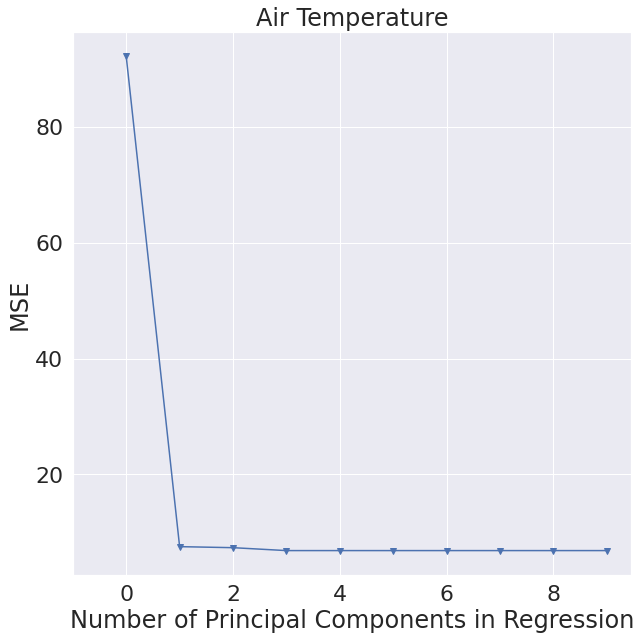

In [ ]:
Y=Factory1_Temperature["AirTemperature"]
Xp=Factory1_Temperature.loc[:,["VaporPressure","MinGrassTemperature","AtmosphericPressure"]]

pca = PCA()
#주성분 분석에서는 Scaling이 반드시 필요하나, 오히려 Scaling을 하면 나쁜 결과를 가져옴으로 제외함
#For Scaling?
#FT_1_X_Reduced = pca.fit_transform(scaler(FT_1_X_Train))
pca_X = pca.fit_transform(Xp)

# 10-fold CV, with shuffle
n = len(pca_X)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), Y, cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 4 principle components, adding one component at the time.
for i in np.arange(1, 10):
    score = -1*model_selection.cross_val_score(regr, pca_X[:,:i], Y, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.figure(figsize=(10,10))
plt.plot(mse, '-v')
plt.xlabel('Number of Principal Components in Regression')
plt.ylabel('MSE')
plt.title("Air Temperature")
plt.xlim(xmin=-1)
pca.components_
pca.mean_

In [ ]:
#Build Principle Components Column
PrincipleComponent = pd.DataFrame(pca_X[:,:1])
PrincipleComponent=PrincipleComponent.rename({0:"PrincipleComponent"},axis="columns")

#Add Date Columns
PrincipleComponent["Date"] = TF_ASOS.loc[:,"Date"]

#Merge Datas
Factory1_Temperature = pd.merge(Factory1_Temperature,PrincipleComponent,on="Date")

#Drop Columns
##Factory1_Temperature.drop(["VaporPressure","MinGrassTemperature","AtmosphericPressure"],axis=1,inplace=True)
Factory1_Temperature.head

,AirTemperature,WindSpeed,Date,PercnetSunshine,GlobalSolarRadiation,PrincipleComponent_x,PrincipleComponent_y,PrincipleComponent_x,PrincipleComponent_y,PrincipleComponent_x,PrincipleComponent_y,PrincipleComponent_x,PrincipleComponent_y,PrincipleComponent_x,PrincipleComponent_y,PrincipleComponent_x,PrincipleComponent_y
0,-1.857627,0.798305,736695.0,89.7,6.95,-21.334041,-21.334041,-21.334041,-21.334041,-21.334041,-21.334041,-21.334041,-21.334041,-21.334041,-21.334041,-21.334041,-21.334041
1,2.916526,1.755994,736696.0,32.0,2.47,-2.995619,-2.995619,-2.995619,-2.995619,-2.995619,-2.995619,-2.995619,-2.995619,-2.995619,-2.995619,-2.995619,-2.995619
2,-3.216420,2.062712,736697.0,89.7,5.54,-21.300353,-21.300353,-21.300353,-21.300353,-21.300353,-21.300353,-21.300353,-21.300353,-21.300353,-21.300353,-21.300353,-21.300353
3,-3.915254,1.113559,736698.0,46.4,2.61,-20.159014,-20.159014,-20.159014,-20.159014,-20.159014,-20.159014,-20.159014,-20.159014,-20.159014,-20.159014,-20.159014,-20.159014
4,-2.008475,1.349153,736699.0,70.4,4.23,-17.330306,-17.330306,-17.330306,-17.330306,-17.330306,-17.330306,-17.330306,-17.330306,-17.330306,-17.330306,-17.330306,-17.330306


In [ ]:
model = smf.ols(formula='AirTemperature~Date+WindSpeed+PercnetSunshine+GlobalSolarRadiation+PrincipleComponent',data=Factory1_Temperature)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AirTemperature   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     3184.
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:39:34   Log-Likelihood:                -1541.7
No. Observations:                 730   AIC:                             3095.
Df Residuals:                     724   BIC:                             3123.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2079.0825    267.200     -7.781      0.000   -2603.662   -1554.502
Date                     0.0028      0.000      7.821      0.000       0.002       0.004
WindSpeed               -1.0898      0.100    -10.948      0.000      -1.285      -0.894
PercnetSunshine         -0.0105      0.004     -2.504      0.012      -0.019      -0.002
GlobalSolarRadiation     0.2555      0.018     14.454      0.000       0.221       0.290
PrincipleComponent       0.5296      0.006     82.228      0.000       0.517       0.542
==============================================================================
Omnibus:                       11.291   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.005
Skew:                          -0.164   Prob(JB):                     0.000552
Kurtosis:                       3.621   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Calculate VIF
y, X = dmatrices('AirTemperature~Date+WindSpeed+PercnetSunshine+GlobalSolarRadiation+PrincipleComponent', data=Factory1_Temperature, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,12927058.3,Intercept
1,1.1,Date
2,1.0,WindSpeed
3,3.2,PercnetSunshine
4,3.3,GlobalSolarRadiation
5,1.9,PrincipleComponent


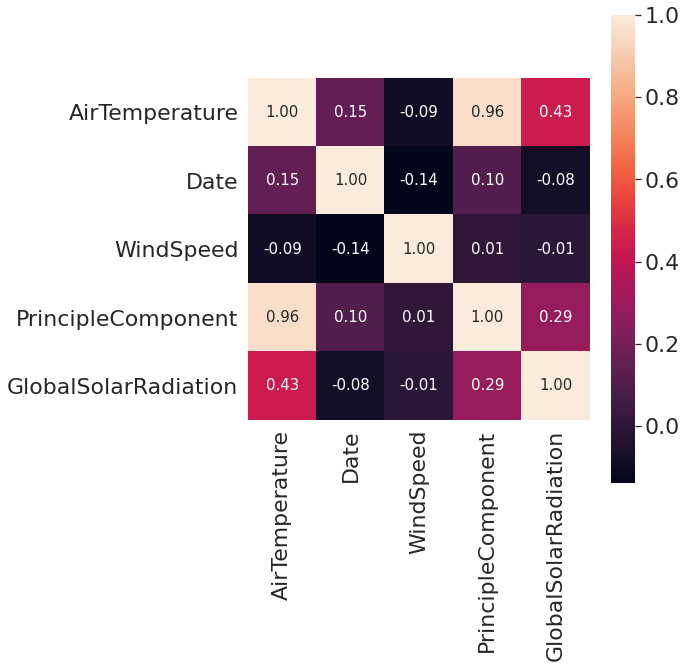

In [ ]:
#Build HeatMap
cols=["AirTemperature","Date","WindSpeed","PrincipleComponent","GlobalSolarRadiation"]
cm = np.corrcoef(Factory1_Temperature[cols].values.T)
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
hm=sns.heatmap(cm, cbar=True, annot=True,square=True,fmt='.2f',annot_kws={"size":15},yticklabels=cols,xticklabels=cols)
plt.tight_layout()
plt.show()

* Split Data within Train & Test Set

In [ ]:
#Factory 1
FT_1_X = Factory1_Temperature.loc[:,["Date","WindSpeed","VaporPressure","AtmosphericPressure","MinGrassTemperature","PercnetSunshine","GlobalSolarRadiation"]]
FT_1_Y = Factory1_Temperature.loc[:,["AirTemperature"]]

#FT_1_X = Factory1_Temperature.loc[:,["Date","WindSpeed","PercnetSunshine","GlobalSolarRadiation","PrincipleComponent"]]
#FT_1_Y = Factory1_Temperature.loc[:,["AirTemperature"]]

#Split Train/Test Data without 'random_state' Parameter
FT_1_X_Train, FT_1_X_Test, FT_1_Y_Train, FT_1_Y_Test = train_test_split(FT_1_X,FT_1_Y,test_size=0.2,shuffle=True)

#Factory 2
FT_2_X = Factory2_Temperature.loc[:,["Date","WindSpeed","VaporPressure","AtmosphericPressure","MinGrassTemperature","PercnetSunshine","GlobalSolarRadiation"]]
FT_2_Y = Factory2_Temperature.loc[:,["AirTemperature"]]

#FT_2_X = Factory2_Temperature.loc[:,["Date","WindSpeed","AtmosphericPressure","PercnetSunshine","GlobalSolarRadiation"]]
#FT_2_Y = Factory2_Temperature.loc[:,["AirTemperature"]]

#Split Train/Test Data without 'random_state' Parameter
FT_2_X_Train, FT_2_X_Test, FT_2_Y_Train, FT_2_Y_Test = train_test_split(FT_2_X,FT_2_Y,test_size=0.2,shuffle=True)

* Evaluation scale = MSE

In [ ]:
#Calculate Mean Squared Error
def MSE(y_true,y_pred):
  return np.mean(np.square((y_true - y_pred)))

- Baseline Model: Linear Regression for Factory #1


MSE Without Scaling: 4.085163
MSE with Scaling: 5.582431
MAD Without Scaling: 1.548384
MAD with Scaling: 1.883404


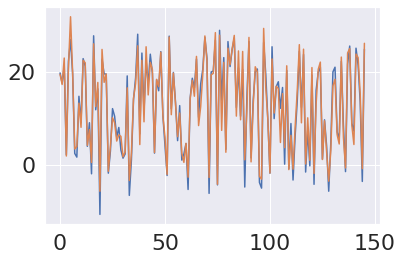

In [ ]:
#Baseline Model - Linear Regression
BaselineModel_F1 = LinearRegression()
BaselineModel_F1.fit(FT_1_X_Train,FT_1_Y_Train)
BaselineModel_F1_true = FT_1_Y_Test.values
BaselineModel_F1_pred = BaselineModel_F1.predict(FT_1_X_Test)

#With Scaling?
scaler=StandardScaler()
FT_1_X_Train_Scale = scaler.fit_transform(FT_1_X_Train)
FT_1_X_Test_Scale = scaler.fit_transform(FT_1_X_Test)

BaselineModel_F1_Scale = LinearRegression()
BaselineModel_F1_Scale.fit(FT_1_X_Train_Scale,FT_1_Y_Train)
BaselineModel_F1_Scale_true = FT_1_Y_Test.values
BaselineModel_F1_Scale_pred = BaselineModel_F1_Scale.predict(FT_1_X_Test_Scale)

#Calculate MSE
print("MSE Without Scaling: %lf\nMSE with Scaling: %lf"%(mean_squared_error(BaselineModel_F1_true,BaselineModel_F1_pred),mean_squared_error(BaselineModel_F1_Scale_true,BaselineModel_F1_Scale_pred)))

#Calculate MAD
print("MAD Without Scaling: %lf\nMAD with Scaling: %lf"%(mean_absolute_error(BaselineModel_F1_true,BaselineModel_F1_pred),mean_absolute_error(BaselineModel_F1_Scale_true,BaselineModel_F1_Scale_pred)))

#Well fitted?
plt.plot(BaselineModel_F1_true)
plt.plot(BaselineModel_F1_pred)

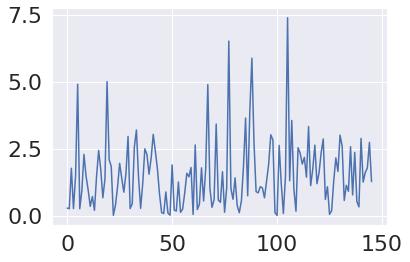

In [ ]:
#Difference Plot
plt.plot(abs(BaselineModel_F1_true-BaselineModel_F1_pred))

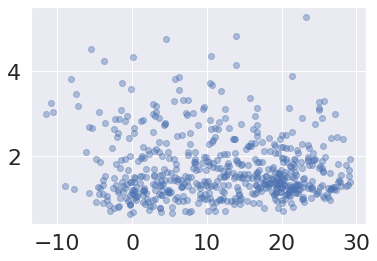

In [ ]:
plt.scatter(FT_1_Y_Train[['AirTemperature']], FT_1_X_Train[['WindSpeed']], alpha=0.4)
#"Date","WindSpeed","VaporPressure","AtmosphericPressure","MinGrassTemperature","PercnetSunshine","GlobalSolarRadiation"
plt.show()

- Baseline Model: Linear Regression for Factory #2

MSE Without Scaling: 4.326359
MSE with Scaling: 4.799537
MAD Without Scaling: 1.465086
MAD with Scaling: 1.705787


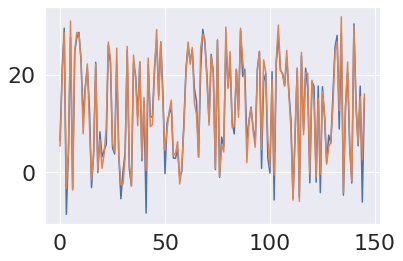

In [ ]:
#Baseline Model - Linear Regression
BaselineModel_F2 = LinearRegression()
BaselineModel_F2.fit(FT_2_X_Train,FT_2_Y_Train)
BaselineModel_F2_true = FT_2_Y_Test.values
BaselineModel_F2_pred = BaselineModel_F2.predict(FT_2_X_Test)

#With Scaling?
scaler=StandardScaler()
FT_2_X_Train_Scale = scaler.fit_transform(FT_2_X_Train)
FT_2_X_Test_Scale = scaler.fit_transform(FT_2_X_Test)

BaselineModel_F2_Scale = LinearRegression()
BaselineModel_F2_Scale.fit(FT_2_X_Train_Scale,FT_2_Y_Train)
BaselineModel_F2_Scale_true = FT_2_Y_Test.values
BaselineModel_F2_Scale_pred = BaselineModel_F2_Scale.predict(FT_2_X_Test_Scale)

#Calculate MSE
print("MSE Without Scaling: %lf\nMSE with Scaling: %lf"%(mean_squared_error(BaselineModel_F2_true,BaselineModel_F2_pred),mean_squared_error(BaselineModel_F2_Scale_true,BaselineModel_F2_Scale_pred)))

#Calculate MAD
print("MAD Without Scaling: %lf\nMAD with Scaling: %lf"%(mean_absolute_error(BaselineModel_F2_true,BaselineModel_F2_pred),mean_absolute_error(BaselineModel_F2_Scale_true,BaselineModel_F2_Scale_pred)))

#Well fitted?
plt.plot(BaselineModel_F2_true)
plt.plot(BaselineModel_F2_pred)

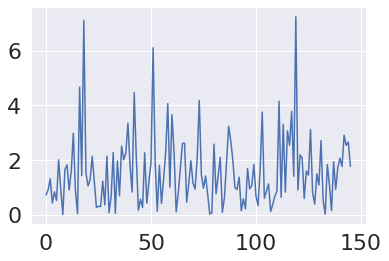

In [ ]:
#Difference Plot
plt.plot(abs(BaselineModel_F2_true-BaselineModel_F2_pred))

* OLS - Ordinary Least Squares Regression for Factory #1

In [ ]:
#OLS Model Reports
OLS_1_Model=sm.OLS(FT_1_Y_Train,FT_1_X_Train)
OLS_1_Fit=OLS_1_Model.fit()
print(OLS_1_Fit.summary())

                                 OLS Regression Results                                
Dep. Variable:         AirTemperature   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              7192.
Date:                Wed, 24 Jun 2020   Prob (F-statistic):                        0.00
Time:                        08:41:31   Log-Likelihood:                         -1264.4
No. Observations:                 584   AIC:                                      2537.
Df Residuals:                     580   BIC:                                      2554.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
#Predict by OLS Model for Factory #1
OLS_1_pred = OLS_1_Fit.predict(FT_1_X_Test)
print("MSE Values: %lf"%MSE(FT_1_Y_Test.values,OLS_1_pred.values))
print("MAD Values: %lf"%mean_absolute_error(FT_1_Y_Test.values,OLS_1_pred.values))

MSE Values: 191.523441
MAD Values: 1.417895


* OLS - Ordinary Least Squares Regression for Factory #2

In [ ]:
#OLS Model Reports
OLS_2_Model=sm.OLS(FT_2_Y_Train,FT_2_X_Train)
OLS_2_Fit=OLS_2_Model.fit()
print(OLS_2_Fit.summary())

                                 OLS Regression Results                                
Dep. Variable:         AirTemperature   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              5143.
Date:                Wed, 24 Jun 2020   Prob (F-statistic):                        0.00
Time:                        08:42:34   Log-Likelihood:                         -1233.1
No. Observations:                 584   AIC:                                      2480.
Df Residuals:                     577   BIC:                                      2511.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
#Predict by OLS Model for Factory #2
OLS_2_pred = OLS_2_Fit.predict(FT_2_X_Test)
print("MSE Values: %lf"%MSE(FT_2_Y_Test.values,OLS_2_pred.values))
print("MAD Values: %lf"%mean_absolute_error(FT_2_Y_Test.values,OLS_2_pred.values))

MSE Values: 209.053290
MAD Values: 1.499622


* PLS - Partial Least Squares Regression for Factory #1

MSE Values: 5.582431
MAD Values: 1.883404


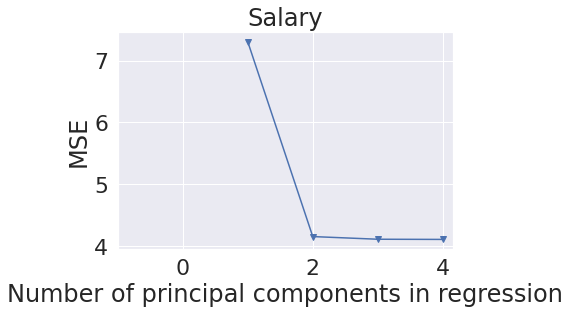

In [ ]:
n = len(FT_1_X_Train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 5):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(FT_1_X_Train), FT_1_Y_Train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 5), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

#Build Model with Components
pls = PLSRegression(n_components=4)
pls.fit(scale(FT_1_X_Train), FT_1_Y_Train)

#Performance Metric
print("MSE Values: %lf"%mean_squared_error(FT_1_Y_Test, pls.predict(scale(FT_1_X_Test))))
print("MAD Values: %lf"%mean_absolute_error(FT_1_Y_Test, pls.predict(scale(FT_1_X_Test))))

* PLS - Partial Least Squares Regression for Factory #2

MSE Values: 4.841603
MAD Values: 1.768051


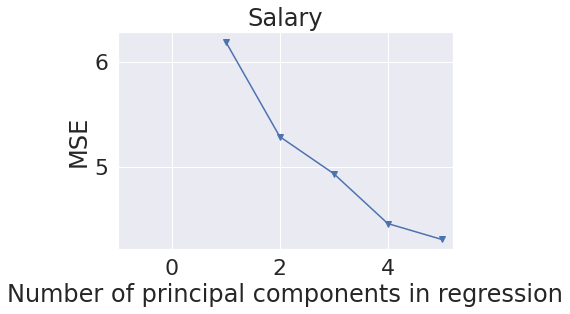

In [ ]:
n = len(FT_2_X_Train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(FT_2_X_Train), FT_2_Y_Train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 6), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

#Build Model with Components
pls = PLSRegression(n_components=5)
pls.fit(scale(FT_2_X_Train), FT_2_Y_Train)

#Performance Metric
print("MSE Values: %lf"%mean_squared_error(FT_2_Y_Test, pls.predict(scale(FT_2_X_Test))))
print("MAD Values: %lf"%mean_absolute_error(FT_2_Y_Test, pls.predict(scale(FT_2_X_Test))))

* PCR - Princple Component Regression for Factory #1

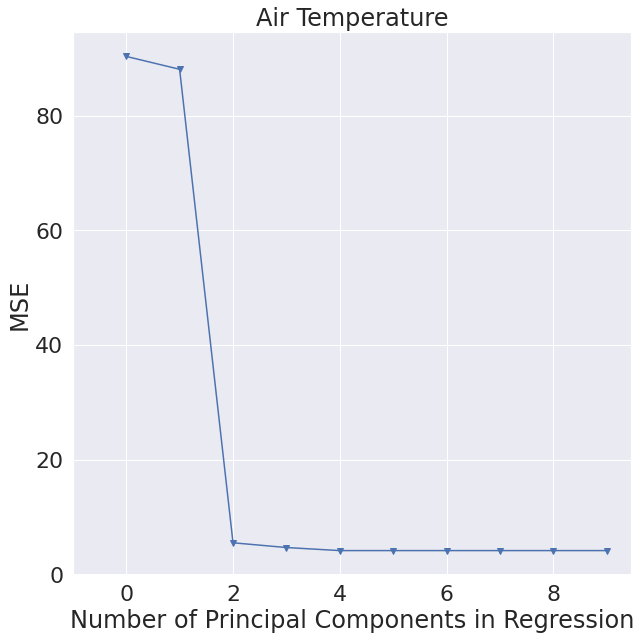

In [ ]:
pca = PCA()
#주성분 분석에서는 Scaling이 반드시 필요하나, 오히려 Scaling을 하면 나쁜 결과를 가져옴으로 제외함
#For Scaling?
#FT_1_X_Reduced = pca.fit_transform(scaler(FT_1_X_Train))
FT_1_X_Reduced = pca.fit_transform(FT_1_X_Train)

# 10-fold CV, with shuffle
n = len(FT_1_X_Reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), FT_1_Y_Train["AirTemperature"], cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 4 principle components, adding one component at the time.
for i in np.arange(1, 10):
    score = -1*model_selection.cross_val_score(regr, FT_1_X_Reduced[:,:i], FT_1_Y_Train["AirTemperature"], cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.figure(figsize=(10,10))
plt.plot(mse, '-v')
plt.xlabel('Number of Principal Components in Regression')
plt.ylabel('MSE')
plt.title("Air Temperature")
plt.xlim(xmin=-1);


MSE Values: 10.393690
MAD Values: 2.532711



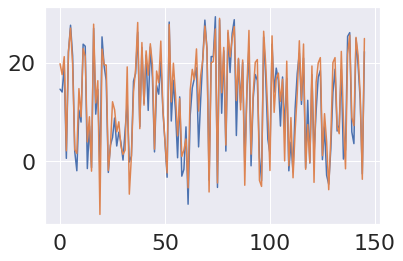

In [ ]:
#Train Regression Model with Principle Component
#Case 4 Principle Component
FT_1_X_Reduced_Test = pca.fit_transform(FT_1_X_Test)

#Linear Regression
regr = LinearRegression()
regr.fit(FT_1_X_Reduced[:,:4], FT_1_Y_Train)
regr_pred = regr.predict(FT_1_X_Reduced_Test[:,:4])

#Calculate MSE
print("\nMSE Values: %lf"%MSE(FT_1_Y_Test,regr_pred))

#Calculate MAD
print("MAD Values: %lf\n"%mean_absolute_error(FT_1_Y_Test,regr_pred))

#Matches?
plt.plot(regr_pred)
plt.plot(FT_1_Y_Test.values)

* PCR - Princple Component Regression for Factory #2

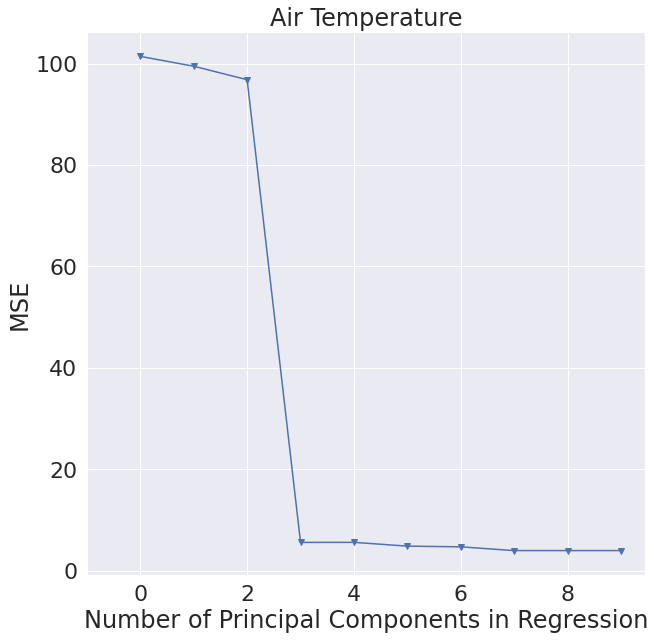

In [ ]:
pca = PCA()
#주성분 분석에서는 Scaling이 반드시 필요하나, 오히려 Scaling을 하면 나쁜 결과를 가져옴으로 제외함
#For Scaling?
#FT_2_X_Reduced = pca.fit_transform(scaler(FT_2_X_Train))
FT_2_X_Reduced = pca.fit_transform(FT_2_X_Train)

# 10-fold CV, with shuffle
n = len(FT_2_X_Reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), FT_2_Y_Train["AirTemperature"], cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 4 principle components, adding one component at the time.
for i in np.arange(1, 10):
    score = -1*model_selection.cross_val_score(regr, FT_2_X_Reduced[:,:i], FT_2_Y_Train["AirTemperature"], cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.figure(figsize=(10,10))
plt.plot(mse, '-v')
plt.xlabel('Number of Principal Components in Regression')
plt.ylabel('MSE')
plt.title('Air Temperature')
plt.xlim(xmin=-1);

MSE Values:16.438964
MAD Values: 3.007090



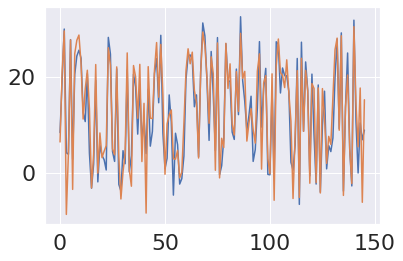

In [ ]:
#Train Regression Model with Principle Component
#Case 4 Principle Component
FT_2_X_Reduced_Test = pca.fit_transform(FT_2_X_Test)

#Linear Regression
regr = LinearRegression()
regr.fit(FT_2_X_Reduced[:,:3], FT_2_Y_Train)
regr_2_pred = regr.predict(FT_2_X_Reduced_Test[:,:3])

#Calculate MSE
print("MSE Values:%lf"%MSE(FT_2_Y_Test,regr_2_pred))

#Calculate MAD
print("MAD Values: %lf\n"%mean_absolute_error(FT_2_Y_Test,regr_2_pred))

#Matches?
plt.plot(regr_2_pred)
plt.plot(FT_2_Y_Test.values)

* Regression with Lasso Regularization for Factory #1

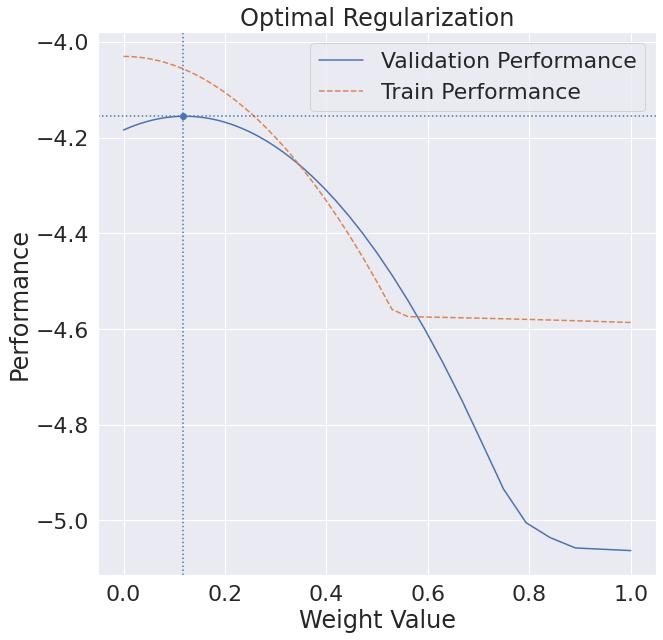


MSE Value by Lasso Regularization Regression Model is: 192.977082
MAD Value by Lasso Regularization Regression Model is: 1.568365



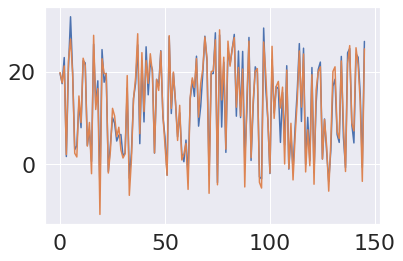

In [ ]:
#Validate Lambda Values for Lasso Regularization
alphas = np.logspace(-5, 0, 200)

train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(FT_1_Y_Train, model.fit(FT_1_X_Train, FT_1_Y_Train).predict(FT_1_X_Train))
    test_score = np.mean(cross_val_score(model, FT_1_X_Test, FT_1_Y_Test, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

#Build Plot to Find Best Alpha Values
plt.figure(figsize=(10,10))
plt.plot(alphas, test_scores, "-", label="Validation Performance")
plt.plot(alphas, train_scores, "--", label="Train Performance")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("Optimal Regularization")
plt.ylabel('Performance')
plt.xlabel('Weight Value')
plt.legend()
plt.show()

#Build Regression Model by Lasso Regularizarion with Best Alpha
LassoReg = Lasso(alpha=optimal_alpha).fit(FT_1_X_Train,FT_1_Y_Train)
Lasso_1_pred = LassoReg.predict(FT_1_X_Test)

#Calculate MSE
print("\nMSE Value by Lasso Regularization Regression Model is: %lf"%MSE(FT_1_Y_Test.values,Lasso_1_pred))

#Calculate MAD
print("MAD Value by Lasso Regularization Regression Model is: %lf\n"%mean_absolute_error(FT_1_Y_Test.values,Lasso_1_pred))

plt.plot(Lasso_1_pred)
plt.plot(FT_1_Y_Test.values)


* Regression with Lasso Regularization for Factory #2

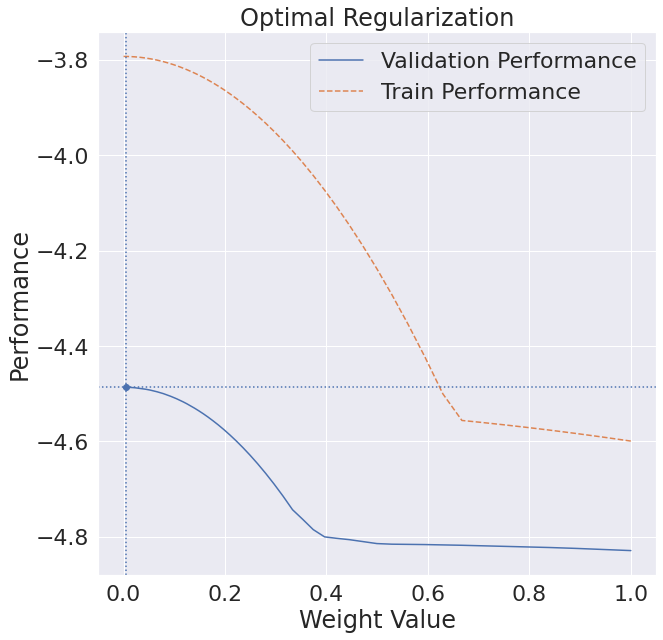


MSE Value by Lasso Regularization Regression Model is: 209.541271
MAD Value by Lasso Regularization Regression Model is: 1.464692



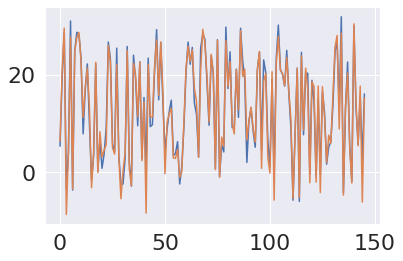

In [ ]:
#Validate Lambda Values for Lasso Regularization
alphas = np.logspace(-5, 0, 200)

train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(FT_2_Y_Train, model.fit(FT_2_X_Train, FT_2_Y_Train).predict(FT_2_X_Train))
    test_score = np.mean(cross_val_score(model, FT_2_X_Test, FT_2_Y_Test, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

#Build Plot to Find Best Alpha Values
plt.figure(figsize=(10,10))
plt.plot(alphas, test_scores, "-", label="Validation Performance")
plt.plot(alphas, train_scores, "--", label="Train Performance")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("Optimal Regularization")
plt.ylabel('Performance')
plt.xlabel('Weight Value')
plt.legend()
plt.show()

#Build Regression Model by Lasso Regularizarion with Best Alpha
LassoReg = Lasso(alpha=optimal_alpha).fit(FT_2_X_Train,FT_2_Y_Train)
Lasso_2_pred = LassoReg.predict(FT_2_X_Test)

#Calculate MSE
print("\nMSE Value by Lasso Regularization Regression Model is: %lf"%MSE(FT_2_Y_Test.values,Lasso_2_pred))

#Calculate MAD
print("MAD Value by Lasso Regularization Regression Model is: %lf\n"%mean_absolute_error(FT_2_Y_Test.values,Lasso_2_pred))

plt.plot(Lasso_2_pred)
plt.plot(FT_2_Y_Test.values)


* RandromForestRegressor for Factory #1


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   36.6s finished



MSE Values: 194.118690
MAD Values: 1.732970



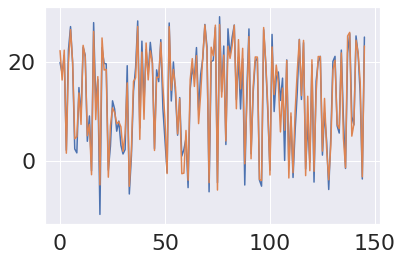

In [ ]:
# Perform Grid-Search
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid={'max_depth': range(3,7),'n_estimators': (10, 50, 100, 1000),},cv=5, scoring='neg_mean_squared_error', verbose=1,n_jobs=1) #n_jobs=-1
grid_result = gsc.fit(FT_1_X_Train, FT_1_Y_Train.values.ravel())
best_params = grid_result.best_params_
    
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)

# Perform K-Fold CV
scores = cross_val_score(rfr, FT_1_X_Test, FT_1_Y_Test.values.ravel(), cv=10, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, FT_1_X_Test, FT_1_Y_Test.values.ravel(), cv=10)

#Calculate Merics
print("\nMSE Values: %lf"%MSE(FT_1_Y_Test.values,predictions))
print("MAD Values: %lf\n"%mean_absolute_error(FT_1_Y_Test.values,predictions))

plt.plot(FT_1_Y_Test.values)
plt.plot(predictions)

* RandomForestRegressor for Factory #2

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   43.4s finished



MSE Values: 207.172779
MAD Values: 1.452268



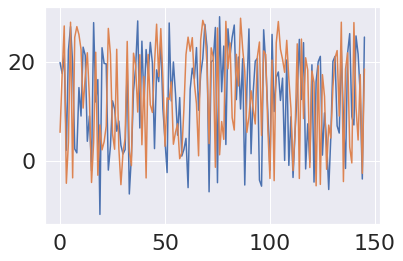

In [ ]:
# Perform Grid-Search
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid={'max_depth': range(3,7),'n_estimators': (10, 50, 100, 1000),},cv=5, scoring='neg_mean_squared_error', verbose=1,n_jobs=1) #n_jobs=-1
grid_result = gsc.fit(FT_2_X_Train, FT_2_Y_Train.values.ravel())
best_params = grid_result.best_params_
    
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)

# Perform K-Fold CV
scores = cross_val_score(rfr, FT_2_X_Test, FT_2_Y_Test.values.ravel(), cv=10, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, FT_2_X_Test, FT_2_Y_Test.values.ravel(), cv=10)

#Calculate Merics
print("\nMSE Values: %lf"%MSE(FT_2_Y_Test.values,predictions))
print("MAD Values: %lf\n"%mean_absolute_error(FT_2_Y_Test.values,predictions))


plt.plot(FT_1_Y_Test.values)
plt.plot(predictions)

* Time-Series Regression Model - AutoRegressive Model for Factory #1


MSE Values: 183.474887
MAD Values: 11.271581



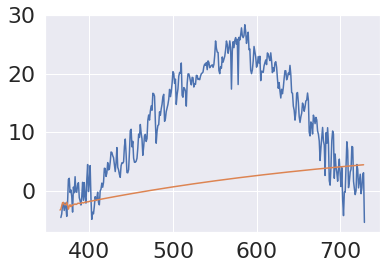

In [ ]:
AR_1_Train = FT_1_Y[:365]
AR_1_Test = FT_1_Y[366:]
AR_1_Model = AR(AR_1_Train)
AR_1_Fitted = AR_1_Model.fit()
predictions = AR_1_Fitted.predict(start=len(AR_1_Train),end=len(AR_1_Train)+len(AR_1_Test)-1,dynamic=False)

#Calculate MSE
print("\nMSE Values: %lf"%MSE(AR_1_Test["AirTemperature"], predictions))

#Calculate MAD
print("MAD Values: %lf\n"%mean_absolute_error(AR_1_Test["AirTemperature"], predictions))

plt.plot(AR_1_Test["AirTemperature"])
plt.plot(predictions)

* Time-Series Regression Model - AutoRegressive Model for Factory #2



MSE Values: 203.780345
MAD Values: 11.881028



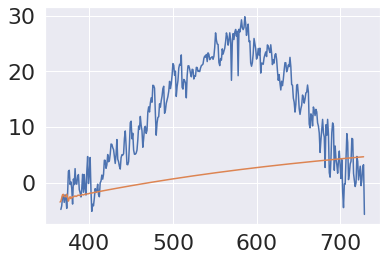

In [ ]:
AR_2_Train = FT_2_Y[:365]
AR_2_Test = FT_2_Y[366:]
AR_2_Model = AR(AR_2_Train)
AR_2_Fitted = AR_2_Model.fit()
predictions = AR_2_Fitted.predict(start=len(AR_2_Train),end=len(AR_2_Train)+len(AR_2_Test)-1,dynamic=False)

#Calculate MSE
print("\nMSE Values: %lf"%MSE(AR_2_Test["AirTemperature"], predictions))

#Calculate MAD
print("MAD Values: %lf\n"%mean_absolute_error(AR_2_Test["AirTemperature"], predictions))

plt.plot(AR_2_Test["AirTemperature"])
plt.plot(predictions)

* Time-Series Regression Model - ARIMA for Factory #1

                              ARMA Model Results                              
Dep. Variable:         AirTemperature   No. Observations:                  365
Model:                     ARMA(1, 0)   Log Likelihood                -798.581
Method:                       css-mle   S.D. of innovations              2.148
Date:                Wed, 24 Jun 2020   AIC                           1603.162
Time:                        05:36:26   BIC                           1614.861
Sample:                             0   HQIC                          1607.811
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5211      5.173      1.647      0.100      -1.617      18.659
ar.L1.AirTemperature     0.9800      0.010     95.513      0.000       0.960       1.000
            

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


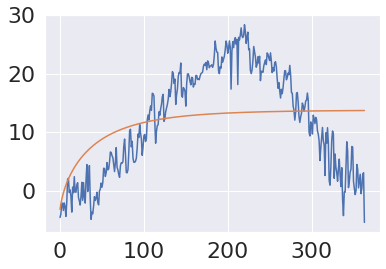

In [ ]:
ARIMA_1_Train = FT_1_Y[:365]
ARIMA_1_Test = FT_1_Y[366:]

#ARIMA Model
model = ARIMA(ARIMA_1_Train, order=(1,0,0))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

model = ARIMA(ARIMA_1_Test, order=(1,0,0))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())
forecast = model_fit.forecast(steps=len(ARIMA_1_Test))

#Calculate MSE
print("\nMSE Values: %lf"%MSE(ARIMA_1_Test.values,list(forecast)[:][0]+list(forecast)[:][1]))

#Calculate MAD
print("MAD Values: %lf\n"%mean_absolute_error(ARIMA_1_Test.values,list(forecast)[:][0]+list(forecast)[:][1]))

plt.plot(ARIMA_1_Test.values)
plt.plot(list(forecast)[:][0]+list(forecast)[:][1])


* Time-Series Regression Model - ARIMA for Factory #2


                              ARMA Model Results                              
Dep. Variable:         AirTemperature   No. Observations:                  365
Model:                     ARMA(1, 0)   Log Likelihood                -817.467
Method:                       css-mle   S.D. of innovations              2.262
Date:                Wed, 24 Jun 2020   AIC                           1640.935
Time:                        05:36:33   BIC                           1652.635
Sample:                             0   HQIC                          1645.584
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.9712      5.453      1.645      0.101      -1.716      19.658
ar.L1.AirTemperature     0.9801      0.010     95.570      0.000       0.960       1.000
            

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


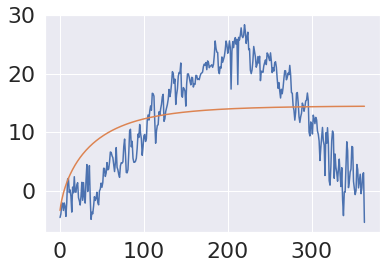

In [ ]:
ARIMA_2_Train = FT_2_Y[:365]
ARIMA_2_Test = FT_2_Y[366:]

#ARIMA Model
model = ARIMA(ARIMA_2_Train, order=(1,0,0))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

model = ARIMA(ARIMA_2_Test, order=(1,0,0))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())
forecast = model_fit.forecast(steps=len(ARIMA_2_Test))

#Calculate MSE
print("\nMSE Values: %lf"%MSE(ARIMA_2_Test.values,list(forecast)[:][0]+list(forecast)[:][1]))

#Calculate MAD
print("MSE Values: %lf\n"%mean_absolute_error(ARIMA_2_Test.values,list(forecast)[:][0]+list(forecast)[:][1]))

plt.plot(ARIMA_1_Test.values)
plt.plot(list(forecast)[:][0]+list(forecast)[:][1])

# Regression for Relative Humitidy

* HeatMap


In [ ]:
#Build HeatMap
cols=["RelativeHumidity","AirTemperature","Rain","DewpointTemperature","LargeEvaporation","VaporPressure"]
cm = np.corrcoef(Factory1_Humidity[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm, cbar=True, annot=True,square=True,fmt='.2f',annot_kws={"size":15},yticklabels=cols,xticklabels=cols)
plt.tight_layout()
plt.show()

* Split Data within Train & Test Set


In [ ]:
#Factory 1
RH_1_X = Factory1_Humidity.loc[:,["AirTemperature","Rain","DewpointTemperature","LargeEvaporation","VaporPressure"]]
RH_1_Y = Factory1_Humidity.loc[:,["RelativeHumidity"]]

#Split Train/Test Data without 'random_state' Parameter
RH_1_X_Train, RH_1_X_Test, RH_1_Y_Train, RH_1_Y_Test = train_test_split(RH_1_X,RH_1_Y,test_size=0.2,shuffle=True)

#Factory 2
RH_2_X = Factory2_Humidity.loc[:,["AirTemperature","Rain","DewpointTemperature","LargeEvaporation","VaporPressure"]]
RH_2_Y = Factory2_Humidity.loc[:,["RelativeHumidity"]]

#Split Train/Test Data without 'random_state' Parameter
RH_2_X_Train, RH_2_X_Test, RH_2_Y_Train, RH_2_Y_Test = train_test_split(RH_2_X,RH_2_Y,test_size=0.2,shuffle=True)

- Baseline Model: Linear Regression for Factory #1

In [ ]:
#Baseline Model - Linear Regression
BaselineModel_R1 = LinearRegression()
BaselineModel_R1.fit(RH_1_X_Train,RH_1_Y_Train)
BaselineModel_R1_true = RH_1_Y_Test.values
BaselineModel_R1_pred = BaselineModel_R1.predict(RH_1_X_Test)

#Calculate MSE
MSE(BaselineModel_R1_true,BaselineModel_R1_pred)

- Baseline Model: Linear Regression for Factory #2

In [ ]:
#Baseline Model - Linear Regression
BaselineModel_R2 = LinearRegression()
BaselineModel_R2.fit(RH_2_X_Train,RH_2_Y_Train)
BaselineModel_R2_true = RH_2_Y_Test.values
BaselineModel_R2_pred = BaselineModel_R2.predict(RH_2_X_Test)

#Calculate MSE
MSE(BaselineModel_R2_true,BaselineModel_R2_pred)

* PCR - Principle Component Regression for Factory #1

In [ ]:
pca = PCA()
FT_2_X_Reduced = pca.fit_transform(scale(RH_1_X_Train))

# 10-fold CV, with shuffle
n = len(RH_1_X_Reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), RH_1_Y_Train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 4 principle components, adding one component at the time.
for i in np.arange(1, 4):
    score = -1*model_selection.cross_val_score(regr, RH_1_X_Reduced[:,:i], RH_1_Y_Train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [ ]:
#Train Regression Model with Principle Component
#Case 4 Principle Component
RH_1_X_Reduced_Test = pca.fit_transform(scale(RH_1_X_Test))

#Linear Regression
regr = LinearRegression()
regr.fit(RH_1_X_Reduced[:,:5], RH_1_Y_Train)
regr_pred = regr.predict(RH_1_X_Reduced_Test)

#Calculate MSE
MSE(RH_1_Y_Test,regr_pred)

* PCR - Principle Component Regression for Factory #2

In [ ]:
pca = PCA()
RH_2_X_Reduced = pca.fit_transform(scale(RH_2_X_Reduced))

# 10-fold CV, with shuffle
n = len(RH_2_X_Reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), RH_2_Y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 4 principle components, adding one component at the time.
for i in np.arange(1, 4):
    score = -1*model_selection.cross_val_score(regr, RH_2_X_Reduced[:,:i], RH_2_Y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [ ]:
#Train Regression Model with Principle Component
#Case 4 Principle Component
RH_2_X_Reduced_Test = pca.fit_transform(scale(RH_2_X_Test))

#Linear Regression
regr = LinearRegression()
regr.fit(RH_2_X_Reduced[:,:5], RH_2_Y_Train)
regr_2_pred = regr.predict(RH_2_X_Reduced_Test)

#Calculate MSE
MSE(RH_2_Y_Test,regr_2_pred)

* Regression with Lasso Regularization for Factory #1

In [ ]:
#Validate Lambda Values for Lasso Regularization
alphas = np.logspace(-5, 0, 200)

train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(RH_1_Y_Train, model.fit(RH_1_X_Train, RH_1_Y_Train).predict(RH_1_X_Train))
    test_score = np.mean(cross_val_score(model, RH_1_X_Test, RH_1_Y_Test, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

#Build Plot to Find Best Alpha Values
plt.plot(alphas, test_scores, "-", label="검증 성능")
plt.plot(alphas, train_scores, "--", label="학습 성능")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("최적 정규화")
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.show()

#Build Regression Model by Lasso Regularizarion with Best Alpha
LassoReg = Lasso(alpha=optimal_alpha).fit(RH_1_X_Train,RH_1_Y_Train)
Lasso_1_pred = LassoReg.predict(RH_1_X_Test)

#Calculate MSE
MSE(RH_1_X_Test,Lasso_1_pred)

* Regression with Lasso Regularization for Factory #2


In [ ]:
#Validate Lambda Values for Lasso Regularization
alphas = np.logspace(-5, 0, 200)

train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(RH_2_Y_Train, model.fit(RH_2_X_Train, RH_2_Y_Train).predict(RH_2_X_Train))
    test_score = np.mean(cross_val_score(model, RH_2_X_Test, RH_2_Y_Test, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

#Build Plot to Find Best Alpha Values
plt.plot(alphas, test_scores, "-", label="검증 성능")
plt.plot(alphas, train_scores, "--", label="학습 성능")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("최적 정규화")
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.show()

#Build Regression Model by Lasso Regularizarion with Best Alpha
LassoReg = Lasso(alpha=optimal_alpha).fit(RH_2_X_Train,RH_2_Y_Train)
Lasso_2_pred = LassoReg.predict(RH_2_X_Test)

#Calculate MSE
MSE(RH_2_X_Test,Lasso_2_pred)

* Time-Series Regression Model - AutoRegressive Model for Factory #1

In [ ]:
AR_Model = AR(RH_1_Y_Train)
AR_Fitted = AR_Model.fit()
predictions = AR_Fitted.predict(start=len(RH_1_Y_Train),end=len(RH_1_Y_Train)+len(RH_1_Y_Test)-1,dynamic=False)

#Calculate MSE
MSE(RH_1_Y_Test, predictions)

* Time-Series Regression Model - AutoRegressive Model for Factory #1

In [ ]:
AR_Model = AR(RH_2_Y_Train)
AR_Fitted = AR_Model.fit()
predictions = AR_Fitted.predict(start=len(RH_2_Y_Train),end=len(RH_2_Y_Train)+len(RH_2_Y_Test)-1,dynamic=False)

#Calculate MSE
MSE(RH_2_Y_Test, predictions)

# About Time-Series Model

* SARIMA Model

In [ ]:
#